# 2020 Post Season Projections

In [39]:
!curl https://projects.fivethirtyeight.com/mlb-api/mlb_elo_latest.csv > mlb_elo_latest.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  796k  100  796k    0     0  2362k      0 --:--:-- --:--:-- --:--:-- 2362k


In [40]:
import pandas as pd

d = pd.read_csv('mlb_elo_latest.csv')
d['date'] = pd.to_datetime(d.date)
d.shape

(2429, 26)

In [41]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2021-10-03,2021,0,NaN,ATL,NYM,1554.739335,1488.433921,0.627110,0.372890,...,53.679792,54.245129,2.123600,13.294327,0.576112,0.423888,NaN,NaN,NaN,NaN
1,2021-10-03,2021,0,NaN,STL,CHC,1537.097504,1449.926247,0.654743,0.345257,...,52.293738,45.659352,7.795868,0.646499,0.642705,0.357295,NaN,NaN,NaN,NaN
2,2021-10-03,2021,0,NaN,SEA,ANA,1504.768430,1478.335924,0.572073,0.427927,...,50.489752,NaN,8.634427,NaN,0.541658,0.458342,NaN,NaN,NaN,NaN
3,2021-10-03,2021,0,NaN,LAD,MIL,1599.430187,1543.625885,0.612870,0.387130,...,58.417971,56.571052,12.034535,1.688043,0.633864,0.366136,NaN,NaN,NaN,NaN
4,2021-10-03,2021,0,NaN,KCR,MIN,1470.538154,1483.953749,0.515227,0.484773,...,41.879897,52.688041,-35.243319,13.725266,0.429816,0.570184,NaN,NaN,NaN,NaN


In [42]:
d.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'rating1_pre', 'rating2_pre', 'pitcher1', 'pitcher2', 'pitcher1_rgs',
       'pitcher2_rgs', 'pitcher1_adj', 'pitcher2_adj', 'rating_prob1',
       'rating_prob2', 'rating1_post', 'rating2_post', 'score1', 'score2'],
      dtype='object')

In [43]:
d = d[d.score1.notnull()]
d.shape

(2321, 26)

<AxesSubplot:>

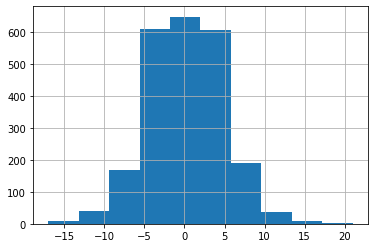

In [44]:
# predicting score differential could be interesting
(d.score1 - d.score2).hist()

In [45]:
d.date.min(), d.date.max()

(Timestamp('2021-04-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

In [46]:
import numpy as np
rename_teams = {
    'ANA': 'LAA',
    'CHW': 'CWS',
    'FLA': 'MIA',
    'KCR': 'KC',
    'SDP': 'SD',
    'SFG': 'SF',
    'TBD': 'TB',
    'WSN': 'WSH'
}
d['team1'] = np.where(d.team1.isin(rename_teams), d.team1.map(rename_teams), d.team1)
d['team2'] = np.where(d.team2.isin(rename_teams), d.team2.map(rename_teams), d.team2)

In [47]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
108,2021-09-25,2021,0,NaN,LAA,SEA,1472.724749,1510.379605,0.480359,0.519641,...,48.646277,52.059812,-4.720489,13.899544,0.495012,0.504988,1490.243507,1490.967550,14.0,1.0
109,2021-09-25,2021,0,NaN,COL,SF,1495.044008,1574.457578,0.420923,0.579077,...,54.082748,54.384142,7.622831,10.932679,0.414767,0.585233,1474.038314,1557.827613,2.0,7.0
110,2021-09-25,2021,0,NaN,ARI,LAD,1432.944685,1603.969419,0.300201,0.699799,...,53.596255,57.923656,24.193122,8.671919,0.318125,0.681875,1439.038224,1604.467469,7.0,2.0
111,2021-09-25,2021,0,NaN,SD,ATL,1501.939082,1553.005972,0.461126,0.538874,...,45.281436,52.810166,-20.348920,-3.359498,0.474109,0.525891,1521.763939,1549.475437,8.0,10.0
112,2021-09-25,2021,0,NaN,CLE,CWS,1496.086234,1532.014598,0.482840,0.517160,...,48.625556,59.152627,-10.495869,24.542203,0.429798,0.570202,1502.703668,1535.033930,6.0,0.0


In [48]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(d[['team1', 'team2']].melt()[['value']])
d['home_team_id'] = encoder.transform(d[['team1']]).astype(int)
d['away_team_id'] = encoder.transform(d[['team2']]).astype(int)
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id
108,2021-09-25,2021,0,NaN,LAA,SEA,1472.724749,1510.379605,0.480359,0.519641,...,-4.720489,13.899544,0.495012,0.504988,1490.243507,1490.967550,14.0,1.0,12,23
109,2021-09-25,2021,0,NaN,COL,SF,1495.044008,1574.457578,0.420923,0.579077,...,7.622831,10.932679,0.414767,0.585233,1474.038314,1557.827613,2.0,7.0,7,24
110,2021-09-25,2021,0,NaN,ARI,LAD,1432.944685,1603.969419,0.300201,0.699799,...,24.193122,8.671919,0.318125,0.681875,1439.038224,1604.467469,7.0,2.0,0,13
111,2021-09-25,2021,0,NaN,SD,ATL,1501.939082,1553.005972,0.461126,0.538874,...,-20.348920,-3.359498,0.474109,0.525891,1521.763939,1549.475437,8.0,10.0,22,1
112,2021-09-25,2021,0,NaN,CLE,CWS,1496.086234,1532.014598,0.482840,0.517160,...,-10.495869,24.542203,0.429798,0.570202,1502.703668,1535.033930,6.0,0.0,6,8


In [49]:
d['home_team_win'] = d.score1.gt(d.score2).astype(int)
d['away_team_win'] = 1 - d.home_team_win
assert (d.home_team_win + d.away_team_win == 1).all()
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id,home_team_win,away_team_win
108,2021-09-25,2021,0,NaN,LAA,SEA,1472.724749,1510.379605,0.480359,0.519641,...,0.495012,0.504988,1490.243507,1490.967550,14.0,1.0,12,23,1,0
109,2021-09-25,2021,0,NaN,COL,SF,1495.044008,1574.457578,0.420923,0.579077,...,0.414767,0.585233,1474.038314,1557.827613,2.0,7.0,7,24,0,1
110,2021-09-25,2021,0,NaN,ARI,LAD,1432.944685,1603.969419,0.300201,0.699799,...,0.318125,0.681875,1439.038224,1604.467469,7.0,2.0,0,13,1,0
111,2021-09-25,2021,0,NaN,SD,ATL,1501.939082,1553.005972,0.461126,0.538874,...,0.474109,0.525891,1521.763939,1549.475437,8.0,10.0,22,1,0,1
112,2021-09-25,2021,0,NaN,CLE,CWS,1496.086234,1532.014598,0.482840,0.517160,...,0.429798,0.570202,1502.703668,1535.033930,6.0,0.0,6,8,1,0


In [50]:
d.shape

(2321, 30)

In [51]:
game_number = pd.concat([
    d[['team1', 'date']].rename({'team1': 'team'}, axis=1),
    d[['team2', 'date']].rename({'team2': 'team'}, axis=1)
]).sort_values(['team', 'date'])
game_number['t'] = game_number.groupby('team').cumcount()
game_number

,team,date,t
2419,ARI,2021-04-01,0
2410,ARI,2021-04-02,1
2397,ARI,2021-04-03,2
2384,ARI,2021-04-04,3
2359,ARI,2021-04-06,4
...,...,...,...
174,WSH,2021-09-21,150
161,WSH,2021-09-22,151
143,WSH,2021-09-23,152
134,WSH,2021-09-24,153


In [52]:
d['t1'] = d.merge(game_number.rename({'team': 'team1'}, axis=1)).t
d['t2'] = d.merge(game_number.rename({'team': 'team2'}, axis=1)).t

In [53]:
# account for double headers
d['total_games'] = d.home_team_win + d.away_team_win

In [54]:
d.sort_values(['date', 'team1'], inplace=True)

In [55]:
winning_percentages = []
for team in d.team1.unique():
    ix = d.team1.eq(team) | d.team2.eq(team)
    dd = d[ix].sort_values('date')
    winning_percentages.append(pd.DataFrame({
        'team': team,
        'date': dd.date,
        't': dd.t1,
        'win': np.where(dd.team1.eq(team), dd.home_team_win, dd.away_team_win)
    }))
    
winning_percentages = pd.concat(winning_percentages).set_index(['team', 'date'])

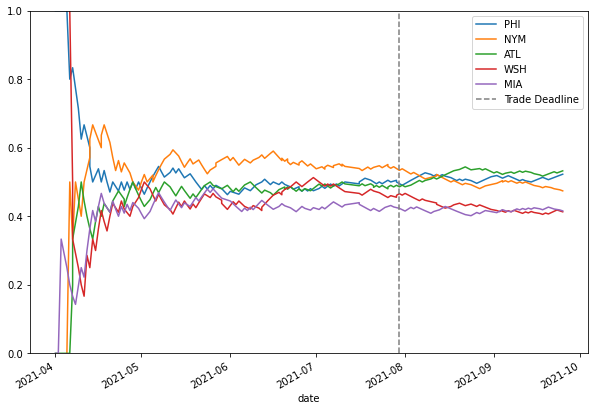

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

for team in ['PHI', 'NYM', 'ATL', 'WSH', 'MIA']:
    _ = (
        winning_percentages.loc[team].win.cumsum()
        .div(np.arange(len(winning_percentages.loc[team])) + 1)
    ).plot(ax=ax, label=team)

ax.set_ylim([0, 1])
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')
ax.legend()

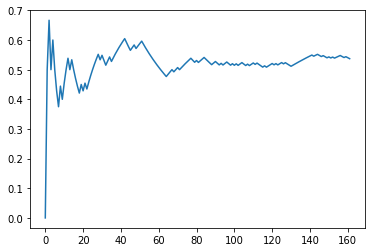

In [57]:
import scipy.stats as ss

plt.plot(np.cumsum(ss.bernoulli(p=.5).rvs(162)) / (np.arange(162) + 1))

In [20]:
d

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,rating2_post,score1,score2,home_team_id,away_team_id,home_team_win,away_team_win,t1,t2,total_games
2425,2021-04-01,2021,0,NaN,CHC,PIT,1510.606166,1466.885465,0.596242,0.403758,...,1435.619713,3.0,5.0,4,21,0,1,NaN,NaN,1
2423,2021-04-01,2021,0,NaN,CIN,STL,1498.995116,1512.719966,0.514783,0.485217,...,1505.421084,6.0,11.0,5,25,0,1,NaN,NaN,1
2422,2021-04-01,2021,0,NaN,COL,LAD,1478.623676,1575.030571,0.397281,0.602719,...,1596.505135,8.0,5.0,7,13,1,0,NaN,NaN,1
2427,2021-04-01,2021,0,NaN,DET,CLE,1450.437505,1513.164945,0.444496,0.555504,...,1511.947362,3.0,2.0,9,6,1,0,NaN,NaN,1
2420,2021-04-01,2021,0,NaN,KC,TEX,1475.389623,1474.626392,0.535577,0.464423,...,1458.180208,14.0,10.0,11,27,1,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2021-09-24,2021,0,NaN,MIN,TOR,1484.446338,1550.447966,0.439848,0.560152,...,1543.253587,3.0,1.0,16,28,1,0,145.0,145.0,1
124,2021-09-24,2021,0,NaN,OAK,HOU,1524.575320,1564.002392,0.477813,0.522187,...,1562.468298,14.0,2.0,19,10,1,0,145.0,145.0,1
135,2021-09-24,2021,0,NaN,PHI,PIT,1509.080421,1432.449696,0.640901,0.359099,...,1423.672442,8.0,6.0,20,21,1,0,144.0,145.0,1
123,2021-09-24,2021,0,NaN,SD,ATL,1504.409820,1550.535233,0.468202,0.531798,...,1548.128363,0.0,4.0,22,1,0,1,145.0,145.0,1


# Define Model

In [ ]:
d['score_diff1'] = d.score1 - d.score2
d['score_diff2'] = d.score2 - d.score1

In [ ]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T



G = d.groupby(['home_team_id', 'away_team_id']).agg(home_team_win=('home_team_win', 'sum'),
                                                    away_team_win=('away_team_win', 'sum'),
                                                    total_games=('home_team_win', 'size')).reset_index()

n_teams = len(G.home_team_id.unique())
n_games = len(G)
n_matchups = np.array([G.total_games, G.total_games]).T
home_team_id = G.home_team_id.values
away_team_id = G.away_team_id.values
observed_wins = G[['home_team_win', 'away_team_win']]


def softmax(a):
    # reshaping for broadcasting
    a = T.exp(a)
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    σ_a = pm.Gamma('σ_a', mu=np.log(5), sd=.2)

    a_t = pm.Normal('a_t', mu=0, sigma=σ_a, shape=n_teams)
    η_t = pm.Normal('η_t', mu=0, sigma=σ_a * .5, shape=n_teams)

    a_1, a_2 = a_t[home_team_id] + η_t[home_team_id], a_t[away_team_id]
    a = T.stack([a_1, a_2]).T

    p = pm.Deterministic('p', softmax(a))
    wins = pm.Binomial('wins', n=n_matchups, p=p, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(5_000, tune=4_000)

In [ ]:
pm.traceplot(trace, var_names=['σ_a', 'a_t', 'η_t'])

## Account For Schedule

In [151]:
d.sort_values(['home_team_id', 'date'], inplace=True)
d['series_begin'] = (
    d.groupby('home_team_id').away_team_id.diff().ne(0)
).astype(int)
d['series_number'] = d.groupby('home_team_id').series_begin.cumsum()

In [152]:
X = d.groupby(['home_team_id', 'team1', 'away_team_id', 'team2', 'series_number']).agg({
    'home_team_win': 'sum',
    'away_team_win': 'sum',
    'total_games': 'size',
    'date': 'min',
}).reset_index()

X['t'] = (X.date - X.date.min()).dt.days + 1

X.sort_values(['date', 'home_team_id'], inplace=True)

X

,home_team_id,team1,away_team_id,team2,series_number,home_team_win,away_team_win,total_games,date,t
117,4,CHC,21,PIT,1,2,1,3,2021-04-01,1
149,5,CIN,25,STL,1,2,1,3,2021-04-01,1
187,7,COL,13,LAD,1,1,3,4,2021-04-01,1
232,9,DET,6,CLE,1,2,1,3,2021-04-01,1
302,11,KC,27,TEX,1,2,1,3,2021-04-01,1
...,...,...,...,...,...,...,...,...,...,...
324,12,LAA,23,SEA,27,1,1,2,2021-09-24,177
395,15,MIL,17,NYM,26,2,0,2,2021-09-24,177
491,19,OAK,10,HOU,26,2,0,2,2021-09-24,177
562,22,SD,1,ATL,26,0,2,2,2021-09-24,177


In [182]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt


n_teams = len(X.home_team_id.unique())
n_dates = X.t.max()
n_games = len(X)
n_matchups = np.array([X.total_games, X.total_games]).T
home_team_id = theano.shared(X.home_team_id.values)
away_team_id = theano.shared(X.away_team_id.values)
# t1 = theano.shared(d.home_team_series_number.values)
# t2 = theano.shared(d.away_team_series_number.values)
t = theano.shared(X.t.values)
series_wins = X[['home_team_win', 'away_team_win']]
total_wins = X.groupby('home_team_id').home_team_win.sum() + X.groupby('away_team_id').away_team_win.sum()
# y_score_delta = X.score1 - X.score2
n_changepoints = 4

# y_game_differential = d.score_diff1
# y_season_differential = (
#     d.groupby('home_team_id').score_diff1.sum() + d.groupby('away_team_id').score_diff2.sum()
# )


def softmax(a):
    # reshaping for broadcasting
    a = tt.exp(a)
    sum_ = tt.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_

with pm.Model() as model:
    α_var = theano.shared(np.array([.5] * n_teams))
    α = pm.Normal('α', mu=0, sd=tt.sqrt(α_var), shape=n_teams)
    
    β_var = theano.shared(np.array([.1] * n_teams))
    β_t = pm.Laplace('β_t', 0, .1, shape=(n_teams, n_changepoints))

    s_δ = pm.Uniform('s_δ', 1, t.max().eval() // n_changepoints, shape=(n_changepoints))
    s = pm.Deterministic('s',
                         (t.max().eval() // n_changepoints) * tt.arange(n_changepoints)
                         + s_δ)

#     ω1 = (t1.max().eval() - t1[:, None]) > s[home_team_id, :]
#     ω2 = (t2.max().eval() - t2[:, None]) > s[away_team_id, :]
    ω = pm.Deterministic('ω', (t.max().eval() - t)[:, None] > s[None, :])
    ω1 = ω2 = ω

    a_1 = pm.Deterministic('a_1',
                           α[home_team_id]
                           + tt.sum(β_t[home_team_id, :] * ω1, axis=-1))
    a_2 = pm.Deterministic('a_2',
                           α[away_team_id]
                           + tt.sum(β_t[away_team_id, :] * ω2, axis=-1))

    mask1 = np.zeros((len(X), 30))
    mask1[np.arange(len(X)), X.home_team_id.values] = 1
    mask2 = np.zeros((len(X), 30))
    mask2[np.arange(len(X)), X.away_team_id.values] = 1

    
    # Likelihood of series win
    p = pm.Deterministic('p', softmax(tt.stack([a_1, a_2]).T))
    likelihood_series_win = pm.Binomial('likelihood_series_win',
                                        p=p,
                                        n=np.stack([X.total_games.values, X.total_games.values]).T,
                                        shape=(n_games, 2),
                                        observed=series_wins.values)
    
    # Likelihood of totals wins
    # https://stats.stackexchange.com/questions/93852/sum-of-bernoulli-variables-with-different-success-probabilities
    μ = pm.Deterministic('μ',
                         (tt.sum(p[:, [0]] * mask1, axis=0)
                         + tt.sum(p[:, [1]] * mask2, axis=0))
                         * X.total_games.values[:, None])
    σ2 = pm.Deterministic('σ2',
                          tt.sum((p[:, [0]] * (1 - p[:, [0]])) * mask1, axis=0)
                        + tt.sum((p[:, [1]] * (1 - p[:, [1]])) * mask2, axis=0))
    # TODO: add potnential for total wins to bound between 0 and 162
    # ValueError: Observed Bound distributions are not supported. If you want to model truncated data you can use a pm.Potential in combination with the cumulative probability function
    likelihood_total_wins = pm.Normal('likelihood_total_wins',
                                               mu=μ,
                                               sigma=tt.sqrt(σ2),
                                               observed=total_wins.values)

# Inspect Model Definition

(array([1.05854598e-03, 6.73222240e-03, 1.24665047e-02, 1.22230801e-02,
        7.42157399e-03, 2.47679985e-03, 8.05726550e-04, 1.31775725e-04,
        7.95445361e-06, 1.22640711e-06]),
 array([  3.95197797,  27.03312125,  50.11426453,  73.19540781,
         96.27655109, 119.35769437, 142.43883765, 165.51998093,
        188.60112421, 211.68226749, 234.76341077]),
 <BarContainer object of 10 artists>)

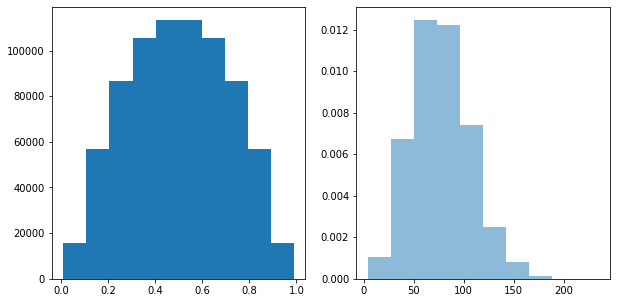

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

with model:
    prior = pm.sample_prior_predictive()

axs[0].hist(prior['p'].ravel())
axs[1].hist(prior['μ'].ravel(), density=True, alpha=.5)


In [184]:
with model:
    map_ = pm.find_MAP(maxeval=10_000)


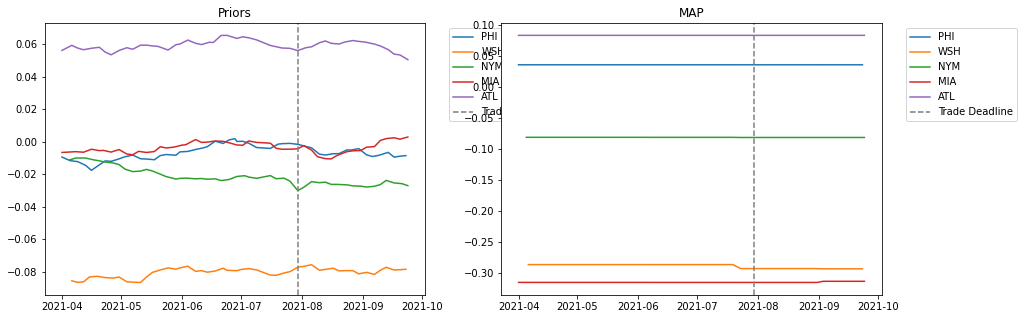

In [185]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

A1 = map_['a_1']
A2 = map_['a_2']
#
A1 = prior['a_1'].mean(axis=0)
A2 = prior['a_2'].mean(axis=0)

# for team in d.team1.unique():
for team in ['PHI', 'WSH', 'NYM', 'MIA', 'ATL']:
# for team in ['LAD', 'SF', 'ARI', 'SD', 'COL']:
    ix = X.team1.eq(team) | X.team2.eq(team)
    axs[0].plot(
        X.date[ix],
        np.where(X[ix].team1.eq(team), prior['a_1'].mean(axis=0)[ix], prior['a_2'].mean(axis=0)[ix]),
        label=team)
    axs[1].plot(
        X.date[ix],
        np.where(X[ix].team1.eq(team), map_['a_1'][ix], map_['a_2'][ix]),
        label=team)

axs[0].set_title('Priors')
axs[1].set_title('MAP')
for ax in axs:
    ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')
    ax.legend(bbox_to_anchor=(1.05, 1))

(array([201., 204., 183., 202., 210., 193., 208., 222., 177., 200.]),
 array([  1.083764  ,  18.56980485,  36.0558457 ,  53.54188654,
         71.02792739,  88.51396824, 106.00000909, 123.48604994,
        140.97209079, 158.45813163, 175.94417248]),
 <BarContainer object of 10 artists>)

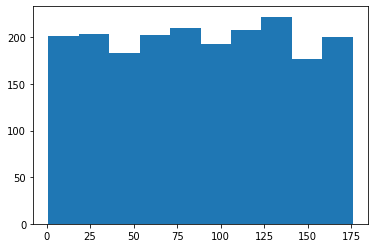

In [186]:
plt.hist(prior['s'].ravel())


## Sample posterior

In [187]:
with model:
    trace = pm.sample()

/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s_δ, β_t, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 850 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


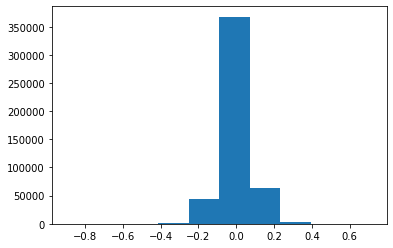

In [188]:
_ = plt.hist(trace['β_t'].ravel())

(array([1.42863379e-02, 0.00000000e+00, 0.00000000e+00, 3.57158448e-06,
        1.42827663e-02, 1.42863379e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.42863379e-02]),
 array([  1.0013448 ,  18.50058089,  35.99981699,  53.49905309,
         70.99828918,  88.49752528, 105.99676138, 123.49599747,
        140.99523357, 158.49446967, 175.99370576]),
 <BarContainer object of 10 artists>)

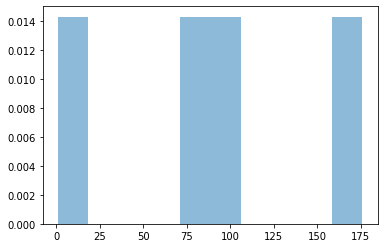

In [189]:
plt.hist(trace['s'].ravel(), density=True, alpha=.5)

(array([7.932e+03, 6.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.700e+01, 1.800e+01, 1.400e+01, 7.950e+03]),
 array([ 1.0013448 ,  5.30058089,  9.59981699, 13.89905309, 18.19828918,
        22.49752528, 26.79676138, 31.09599747, 35.39523357, 39.69446967,
        43.99370576]),
 <BarContainer object of 10 artists>)

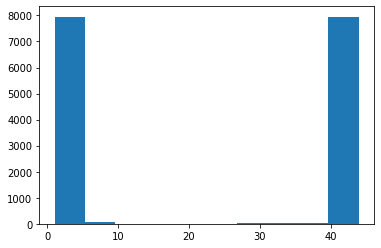

In [190]:
plt.hist(trace['s_δ'].ravel())

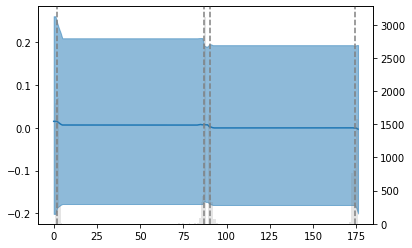

In [200]:
team = 'SD'

t.set_value(np.arange(X.t.max(), dtype='int'))
home_team_id.set_value(encoder.transform([[team]]).repeat(X.t.max()).astype('int'))
away_team_id.set_value(encoder.transform([[team]]).repeat(X.t.max()).astype('int'))
post = pm.sample_posterior_predictive(trace, var_names=['a_1', 'β_t', 's'], model=model)

_ = plt.plot(post['a_1'].mean(axis=0), color='C0')
_ = plt.fill_between(
    np.arange(X.t.max()),
    np.quantile(post['a_1'], .05, axis=0),
    np.quantile(post['a_1'], .95, axis=0), color='C0', alpha=.5)

plt.gca().twinx().hist(post['s'].ravel(), alpha=.2, color='C7', bins=X.t.max().astype(int))
for v in post['s'].mean(axis=0):
    plt.gca().axvline(v, color='C7', ls='--')

# plt.gca().twinx().hist(post['s'][:, encoder.transform([[team]]).astype(int)[0, 0], :].ravel(), alpha=.2, color='C7', bins=d.t1.max().astype(int))
# for v in post['s'][:, encoder.transform([[team]]).astype(int)[0, 0], :].mean(axis=0):
#     plt.gca().axvline(v, color='C7', ls='--')

(array([4.00000e+00, 9.00000e+00, 4.00000e+01, 1.84800e+03, 4.33360e+04,
        3.67669e+05, 6.33400e+04, 3.42400e+03, 3.05000e+02, 2.50000e+01]),
 array([-0.89456165, -0.7335857 , -0.57260976, -0.41163381, -0.25065787,
        -0.08968192,  0.07129402,  0.23226997,  0.39324591,  0.55422186,
         0.7151978 ]),
 <BarContainer object of 10 artists>)

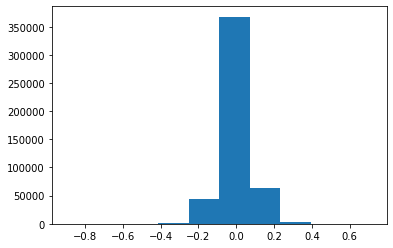

In [202]:
plt.hist(post['β_t'].ravel())


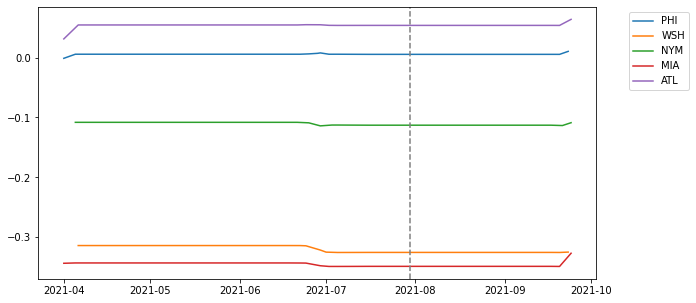

In [205]:
fig, ax = plt.subplots(figsize=(10, 5))

A1 = trace['a_1'].mean(axis=0)
A2 = trace['a_2'].mean(axis=0)

for team in ['PHI', 'WSH', 'NYM', 'MIA', 'ATL']:
# for team in ['LAD', 'SD', 'SF', 'ARI', 'COL']:
    ix = X.team1.eq(team) | X.team2.eq(team)
    ax.plot(
        X.date[ix],
        np.where(X[ix].team1.eq(team), A1[ix], A2[ix]),
        label=team)

ax.legend(bbox_to_anchor=(1.05, 1))
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')

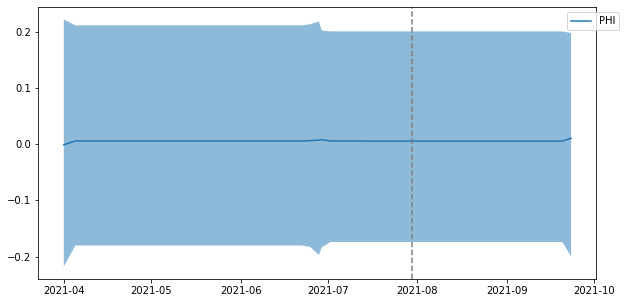

In [208]:
fig, ax = plt.subplots(figsize=(10, 5))

A1 = trace['a_1']
A2 = trace['a_2']

for team in ['PHI']:
    ix = X.team1.eq(team) | X.team2.eq(team)
    ax.plot(
        X.date[ix],
        np.where(X[ix].team1.eq(team), A1[:, ix].mean(axis=0), A2[:, ix].mean(axis=0)),
        label=team)
    

ax.set_prop_cycle(None)
for team in ['PHI']:
    ix = X.team1.eq(team) | X.team2.eq(team)
    ax.fill_between(
        X.date[ix],
        np.where(X[ix].team1.eq(team), np.quantile(A1[:, ix], .05, axis=0), np.quantile(A2[:, ix], .05, axis=0)),
        np.where(X[ix].team1.eq(team), np.quantile(A1[:, ix], .95, axis=0), np.quantile(A2[:, ix], .95, axis=0)),
        alpha=.5
    )

ax.legend(bbox_to_anchor=(1.05, 1))
ax.axvline(pd.to_datetime('2021-07-30'), ls='--', color='C7', label='Trade Deadline')

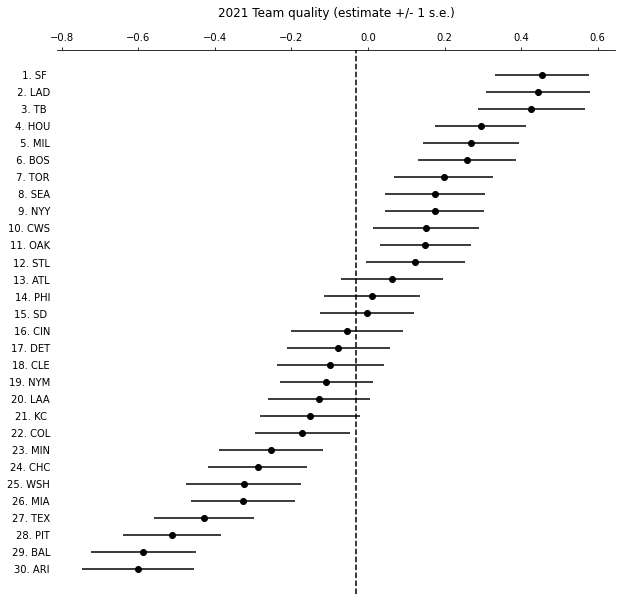

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

weights = np.concatenate([
    trace['s'][:, [0]],
    (trace['s'][:, 1:] - trace['s'][:, :-1])
], axis=1)

# a_t = trace['α'][:, :, None] + (trace['β_t'] * weights[:, None, :])
a_t = trace['α']
estimated_abilities = a_t.mean(axis=(0))
estimated_abilities_error = a_t.std(axis=(0))
team_id_lookup = {i: t for i, t in enumerate(encoder.categories_[0])}

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('2021 Team quality (estimate +/- 1 s.e.)', y=1.05)

# plt.savefig('2020-postseason-projections/team-quality-estimates.png')

# Projections

## Constants and paramters

In [ ]:
# A lot of the values below will be hard-coded so I'll use these constants
# to make sure nothing gets dropped due to typos

WILD_CARD_CHAMPION = 'Wild Card Champion'
DIVISION_CHAMPION = 'Division Champion'
LEAGUE_CHAMPION = 'League Champion'
WORLD_SERIES_CHAMPION = 'World Series Champion'

LAD = 'LAD'
TB = 'TB'
SD = 'SD'
MIN = 'MIN'
CWS = 'CWS'
ATL = 'ATL'
CLE = 'CLE'
OAK = 'OAK'
CHC = 'CHC'
NYY = 'NYY'
TOR = 'TOR'
MIA = 'MIA'
STL = 'STL'
CIN = 'CIN'
MIL = 'MIL'
HOU = 'HOU'
SEA = 'SEA'
SF = 'SF'
PIT = 'PIT'
TEX = 'TEX'
ARI = 'ARI'
PHI = 'PHI'
NYM = 'NYM'
LAA = 'LAA'
KC = 'KC'
DET = 'DET'
COL = 'COL'
BOS = 'BOS'
BAL = 'BAL'
WSH = 'WSH'



# we'll need this for evaluations
series_id_to_prediction_column = {
    'wild_card_id': WILD_CARD_CHAMPION,
    'division_id': DIVISION_CHAMPION,
    'championship_id': LEAGUE_CHAMPION,
    'world_series_id': WORLD_SERIES_CHAMPION
}

In [ ]:


series_ids = pd.DataFrame([
    # American League
    [TB, 1, 1, 1, 1],
    [TOR, 1, 1, 1, 1],
    [CLE, 2, 1, 1, 1],
    [NYY, 2, 1, 1, 1],
    [MIN, 3, 2, 1, 1],
    [HOU, 3, 2, 1, 1],
    [OAK, 4, 2, 1, 1],
    [CWS, 4, 2, 1, 1],
    # National League
    [LAD, 5, 3, 2, 1],
    [MIL, 5, 3, 2, 1],
    [SD,  6, 3, 2, 1],
    [STL, 6, 3, 2, 1],
    [CHC, 7, 4, 2, 1],
    [MIA, 7, 4, 2, 1],
    [ATL, 8, 4, 2, 1],
    [CIN, 8, 4, 2, 1],
], columns=['Team', 'wild_card_id', 'division_id', 'championship_id', 'world_series_id'])

In [ ]:
import json
with open('divisions.json') as f:
    divisions = json.load(f)
divisions = {team: division for division, teams in divisions.items() for team in teams}
divisions

In [ ]:
results = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

In [ ]:
import numpy as np
from tqdm.notebook import trange


def np_softmax(a):
    a = np.exp(a)
    return a / a.sum()


class Simulation:
    def __init__(self, a_post, encoder):
        self.a_post = a_post
        self.encoder = encoder
        self._sample = None
        
    def __enter__(self):
        self._sample = self.a_post[np.random.choice(len(self.a_post))]
        return self
    
    def __exit__(self, *exc):
        self._sample = None
        return False
    
    def simulate_series(self, team1, team2, best_of):
        id1, id2 = self._team_id(team1), self._team_id(team2)
        a = self._sample[[id1, id2]]
        p = np_softmax(a)
        wins1 = np.random.binomial(best_of, p[0])
        return team1 if wins1 > best_of // 2 else team2
    
    def _team_id(self, team):
        return self.encoder.transform([[team]])[0, 0].astype(int)



n_sim = 10_000

def make_update_results(category):
    def wrapper(df, team):
        df.loc[df.Team.eq(team), category] += 1

#         if category == DIVISION_CHAMPION:
#             df.loc[df.Team.eq(team), WILD_CARD_CHAMPION] -= 1
#         elif category == LEAGUE_CHAMPION:
#             df.loc[df.Team.eq(team), DIVISION_CHAMPION] -= 1
#         elif category == WORLD_SERIES_CHAMPION:
#             df.loc[df.Team.eq(team), LEAGUE_CHAMPION] -= 1

    return wrapper

update_wildcard_champion = make_update_results(WILD_CARD_CHAMPION)
update_division_champion = make_update_results(DIVISION_CHAMPION)
update_league_champion = make_update_results(LEAGUE_CHAMPION)
update_world_series_champion = make_update_results(WORLD_SERIES_CHAMPION)

for _ in trange(n_sim):
    with Simulation(trace['a_t'], encoder) as sim:

        # ALDS 1
        alwc1 = sim.simulate_series(TB, TOR, 3)
        alwc2 = sim.simulate_series(CLE, NYY, 3)
        update_wildcard_champion(results, alwc1)
        update_wildcard_champion(results, alwc2)

        alds1 = sim.simulate_series(alwc1, alwc2, 5)
        update_division_champion(results, alds1)

        # AL WC2
        alwc3 = sim.simulate_series(MIN, HOU, 3)
        alwc4 = sim.simulate_series(OAK, CWS, 3)
        update_wildcard_champion(results, alwc3)
        update_wildcard_champion(results, alwc4)

        alds2 = sim.simulate_series(alwc3, alwc4, 5)
        update_division_champion(results, alds2)

        # ALCS
        alcs = sim.simulate_series(alds1, alds2, 7)
        update_league_champion(results, alcs)

        # NLDS 1
        nlwc1 = sim.simulate_series(LAD, MIL, 3)
        nlwc2 = sim.simulate_series(SD, STL, 3)
        update_wildcard_champion(results, nlwc1)
        
        update_wildcard_champion(results, nlwc2)
        nlds1 = sim.simulate_series(nlwc1, nlwc2, 5)
        update_division_champion(results, nlds1)

        # NLDS 2
        nlwc3 = sim.simulate_series(CHC, MIA, 3)
        nlwc4 = sim.simulate_series(ATL, CIN, 3)
        update_wildcard_champion(results, nlwc3)
        update_wildcard_champion(results, nlwc4)
        
        nlds2 = sim.simulate_series(nlwc3, nlwc4, 5)
        update_division_champion(results, nlds2)

        # NLCS
        nlcs = sim.simulate_series(nlds1, nlds2, 7)
        update_league_champion(results, nlcs)

        # WS
        ws = sim.simulate_series(alcs, nlcs, 7)
        update_world_series_champion(results, ws)

results.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (n_sim / 100)

In [ ]:
results.sort_values(WORLD_SERIES_CHAMPION, ascending=False, inplace=True)
results.set_index(np.arange(len(results)) + 1, inplace=True)
results

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert np.allclose(results.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum(), 100)

In [ ]:
assert np.isclose(results[WORLD_SERIES_CHAMPION].sum(), 100.), results[WORLD_SERIES_CHAMPION].sum()

# Get predictions from mlb.com
https://www.mlb.com/news/2020-mlb-postseason-predictions

In [ ]:
mlb_predictions = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

# per richard justice
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, ATL)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, CWS)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)

update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per mark feinsand
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, CIN)
update_division_champion(mlb_predictions, SD)

update_league_champion(mlb_predictions, SD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per sarah langs
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, TB)
update_league_champion(mlb_predictions, LAD)

update_world_series_champion(mlb_predictions, LAD)


# per anthony castrovince
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per will leitch
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, CLE)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, CLE)

update_world_series_champion(mlb_predictions, CLE)


# per mike petriello
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per nathalie alonso
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per andrew simon
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, SD)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jon paul morosi
update_wildcard_champion(mlb_predictions, TOR)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per david venn

update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)

mlb_predictions.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (12 / 100)
mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] = mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]].round()

In [ ]:
mlb_predictions

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert (np.abs(mlb_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Get fivethirtyeight predictions
https://projects.fivethirtyeight.com/2020-mlb-predictions/

In [ ]:
fivethirtyeight_predictions = pd.read_html('https://web.archive.org/web/20200929183851/https://projects.fivethirtyeight.com/2020-mlb-predictions/')
fivethirtyeight_predictions = fivethirtyeight_predictions[2].droplevel(0, axis=1).iloc[:, [0, 1, 4, 5, 6, 7]]
fivethirtyeight_predictions.columns = [
    'Team',
    'Division',
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]
fivethirtyeight_predictions.replace('—', '0%', inplace=True)
fivethirtyeight_predictions.replace('<1%', '0%', inplace=True)
for col in [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]:
    fivethirtyeight_predictions[col] = fivethirtyeight_predictions[col].str[:-1].astype(float)
fivethirtyeight_predictions

In [ ]:
fivethirtyeight_rename = {
    'DodgersDodgers': LAD,
    'RaysRays': TB,
    'TwinsTwins': MIN,
    'YankeesYankees': NYY,
    'BravesBraves': ATL,
    'PadresPadres': SD,
    'AstrosAstros': HOU,
    'AthleticsAthletics': OAK,
    'CubsCubs': CHC,
    'IndiansIndians': CLE,
    'RedsReds': CIN,
    'White SoxWhite Sox': CWS,
    'CardinalsCardinals': STL,
    'BrewersBrewers': MIL,
    'Blue JaysBlue Jays': TOR,
    'MarlinsMarlins': MIA,
    'GiantsGiants': SF,
    'PhilliesPhillies': PHI,
    'MarinersMariners': SEA,
    'NationalsNationals': WSH,
    'MetsMets': NYM,
    'RockiesRockies': COL,
    'RoyalsRoyals': KC,
    'AngelsAngels': LAA,
    'OriolesOrioles': BAL,
    'DiamondbacksDbacks': ARI,
    'Red SoxRed Sox': BOS,
    'TigersTigers': DET,
    'RangersRangers': TEX,
    'PiratesPirates': PIT,
}
fivethirtyeight_predictions['Team'] = fivethirtyeight_predictions.Team.map(fivethirtyeight_rename)
fivethirtyeight_predictions['Division'] = fivethirtyeight_predictions.Division.str.strip()

In [ ]:
fivethirtyeight_predictions

In [ ]:
for s in series_ids.drop('Team', axis=1).columns:
    print(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum())
    assert (np.abs(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Create final data frame with all predictions

In [ ]:
final = pd.concat([
    results.set_index(['Team', 'Division']),
    mlb_predictions.set_index(['Team', 'Division']),
    fivethirtyeight_predictions.set_index(['Team', 'Division'])
], axis=1, keys=['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])
final.sort_values([('DG: Probability of Becomming', WORLD_SERIES_CHAMPION)], ascending=False)

# Evaluations

In [ ]:
from functools import partial

LOST_WILD_CARD = 'Lost Wild Card Series'

outcomes = pd.DataFrame([
    [LAD, 'Dodgers win World Series', WORLD_SERIES_CHAMPION],
    [TB, 'Rays win ALCS,\n but lose World Series', LEAGUE_CHAMPION],
    [ATL, 'Braves win Division Series,\n but lose NLCS', DIVISION_CHAMPION],
    [HOU, 'Astros win Division Series,\n but lose ALCS', DIVISION_CHAMPION],
    [SD, 'Padres win Wild Card,\n lose Division Series', WILD_CARD_CHAMPION],
    [MIA, 'Marlins win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [NYY, 'Yankees win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [OAK, 'A\'s win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    
#     [TOR, 'Blue Jays lose the Wild Card Series', LOST_WILD_CARD],
#     [CLE, 'Indians lose the Wild Card Series', LOST_WILD_CARD],
#     [MIN, 'Twins lose the Wild Card Series', LOST_WILD_CARD],
#     [CWS, 'White Sox lose the Wild Card Series', LOST_WILD_CARD],
#     [MIL, 'Brewers lose the Wild Card Series', LOST_WILD_CARD],
#     [STL, 'Cardinals lose the Wild Card Series', LOST_WILD_CARD],
#     [CHC, 'Cubs lose the Wild Card Series', LOST_WILD_CARD],
#     [CIN, 'Reds lose the Wild Card Series', LOST_WILD_CARD]
], columns=['team', 'description', 'title'])

In [ ]:
titles = [
    LOST_WILD_CARD,
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]

title_index = {t: i for i, t in enumerate(titles)}

def calculate_likelihoods(predictions):
    L = pd.DataFrame({
        'team': predictions.Team,
    })
    L[WORLD_SERIES_CHAMPION] = predictions[WORLD_SERIES_CHAMPION]
    L[LEAGUE_CHAMPION] = predictions[LEAGUE_CHAMPION] - predictions[WORLD_SERIES_CHAMPION]
    L[DIVISION_CHAMPION] = predictions[DIVISION_CHAMPION] - predictions[LEAGUE_CHAMPION]
    L[WILD_CARD_CHAMPION] = predictions[WILD_CARD_CHAMPION] - predictions[DIVISION_CHAMPION]
    L[LOST_WILD_CARD] = 100 - predictions[WILD_CARD_CHAMPION]
    assert L.drop('team', axis=1).sum(axis=1).eq(100).all(), L
    L = L.melt(id_vars='team', value_vars=titles, var_name='title', value_name='likelihood')
    L['likelihood'] /= 100
    return L

dg_likelihoods = calculate_likelihoods(results)
five38_likelihoods = calculate_likelihoods(fivethirtyeight_predictions)
mlb_likelihoods = calculate_likelihoods(mlb_predictions)

In [ ]:
random_model = {
    LOST_WILD_CARD: (1 / 2),
    WILD_CARD_CHAMPION: (1 / 2),
    DIVISION_CHAMPION: (1 / (2 ** 2)),
    LEAGUE_CHAMPION: (1 / (2 ** 3)),
    WORLD_SERIES_CHAMPION: (1 / (2 ** 4))
}

random_likelihoods = outcomes.copy()
random_likelihoods['likelihood'] = random_likelihoods.title.map(random_model)
random_likelihoods

In [ ]:
outcomes['DG'] = outcomes.merge(dg_likelihoods).likelihood
outcomes['FiveThirtyEight'] = outcomes.merge(five38_likelihoods).likelihood
outcomes['mlb.com'] = outcomes.merge(mlb_likelihoods).likelihood
outcomes['Random Chance'] = outcomes.merge(random_likelihoods).likelihood

In [ ]:
outcomes

In [ ]:
# fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharex=True,  sharey=True)


# axs[0].set(title='DG', xlabel='Likelihood', ylabel='Frequency', xlim=(0, 1))
# axs[1].set(title='FiveThirtyEight', xlabel='Likelihood')
# axs[2].set(title='mlb.com', xlabel='Likelihood')
# axs[3].set(title='random', xlabel='Likelihood')

# outcomes.dg_likelihood.hist(alpha=0.8, ax=axs[0])
# outcomes.five38_likelihood.hist(alpha=0.8, ax=axs[1])
# outcomes.mlb_likelihood.hist(alpha=0.8, ax=axs[2])
# outcomes.random_likelihood.hist(alpha=0.8, ax=axs[3])

# plt.gca().legend()

In [ ]:
import seaborn as sns

FORECASTS = ['DG', 'FiveThirtyEight', 'mlb.com', 'Random Chance']
Y_LABEL = 'description'
X_LABEL = 'Likelihood'
LEGEND = 'Forecast'

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Forecasted Likelihoods of Postseason Outcomes')

z = outcomes.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS,
    value_name=X_LABEL,
    var_name=LEGEND)

sns.barplot(y=Y_LABEL, x=X_LABEL, hue=LEGEND, data=z)
ax.set(ylabel=None, xlim=(0, 1))

plt.tight_layout()
plt.savefig('2020-evaluations/forecasted-likelihoods.png')

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 11))

z = outcomes.copy()
z[FORECASTS] = z[FORECASTS] / z['Random Chance'].values.reshape((-1, 1))
z.drop('Random Chance', axis=1, inplace=True)
z = z.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS[:-1],
    var_name=LEGEND,
    value_name='Ratio of Forecasted Likelihood to Random Chance')

sns.barplot(y=Y_LABEL, x='Ratio of Forecasted Likelihood to Random Chance', hue=LEGEND, data=z)

# reference line
ax.axvline(1, ls='--', color='k', alpha=0.6, label='Prediction Is Equal To Random Chance',)
ax.legend()
ax.annotate(
    r'$\rightarrow$: Bars to the right of line indicate the forecasted likelihood was greater than random chance.'
    '\n'
    r'$\leftarrow$: Bars to the left of line indicate the forecasted likelihood was less than random chance.',
    (1.2, 3))

# plot options
ax.set_title('Forecasted Likelihoods Compared to Random Chance')
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(), multialignment='center')
plt.tight_layout()

plt.savefig('2020-evaluations/forecasts-vs-random.png')

In [ ]:
random = 1 / (2 ** 15)

print(outcomes[FORECASTS].mean(axis=0).rename('Average Likelihood').to_markdown())
print()

print(outcomes[FORECASTS].prod(axis=0).rename('Total Likelihood').to_markdown())
print()


print(outcomes[FORECASTS].prod(axis=0).div(random).rename('Forecasted Likelihood / Random Chance').to_markdown())